 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Set csv paths

whale_path = Path('whale_returns.csv')
algo_path = Path('algo_returns.csv')
sp500_path = Path('sp500_history.csv')


In [3]:
# Read csv data

whale_returns = pd.read_csv(whale_path, index_col='Date', parse_dates=True)
algo_returns = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
sp500_history = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, date_format='%d-%b-%y')


# Sort Whale Returns DataFrame
whale_returns = whale_returns.sort_values(by='Date')

# Sort Algorithmic Returns DataFrame
algo_returns = algo_returns.sort_values(by='Date')

# Sort S&P 500 History DataFrame
sp500_history = sp500_history.sort_values(by='Date')



# Display the first few rows of each DataFrame to check if the data has been loaded correctly
print("Whale Returns:")
print(whale_returns.head())
print("\nAlgorithmic Trading Returns:")
print(algo_returns.head())
print("\nS&P 500 Historical Prices:")
print(sp500_history.head())



Whale Returns:
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  

Algorithmic Trading Returns:
              Algo 1  Algo 2
Date                        
2014-05

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
import pandas as pd
from pathlib import Path

whale_path = Path('whale_returns.csv')
whale_returns = pd.read_csv(whale_path, index_col='Date', parse_dates=True)

# Display the first few rows of each DataFrame to check if the data has been loaded correctly
print("Whale Returns:")
print(whale_returns.head())



Whale Returns:
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [5]:
# Count nulls

whale_returns.isnull().sum ()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:

# Drop nulls
whale_returns = whale_returns.dropna()

# Drop duplicates
whale_returns = whale_returns.drop_duplicates()

# Validate no more missing values
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns

algo_path = Path('algo_returns.csv')
algo_returns = pd.read_csv(algo_path, index_col='Date', parse_dates=True)

# Display the first few rows of each DataFrame to check if the data has been loaded correctly
print("Algo Returns:")
algo_returns.head()

Algo Returns:


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna()

# Drop duplicates
algo_returns = algo_returns.drop_duplicates()

# Validate no more missing values
algo_returns.isnull().sum()



Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
import pandas as pd
from pathlib import Path

sp500_path = Path('sp500_history.csv')
sp500_history = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, date_format='%d-%b-%y')
sp500_history.head()



,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Calculate Daily Returns - TUTOR - SP500 daily rerturn do not match

# Load the data and fix data types
sp500_path = Path('sp500_history.csv')
sp500_history = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()
sp500_history['Close'] = pd.to_numeric(sp500_history['Close'].replace('[\$,]', '', regex=True), errors='coerce')

# Calculate Daily Returns
sp500_history['Daily Returns'] = sp500_history['Close'].pct_change()

# Rename 'Daily Returns' column to 'S&P 500'

# Display the updated DataFrame
print(sp500_history.head())
display(sp500_history.tail())
sp500_history.head()





              Close  Daily Returns
Date                              
2012-10-01  1444.49            NaN
2012-10-02  1445.75       0.000872
2012-10-03  1450.99       0.003624
2012-10-04  1461.40       0.007174
2012-10-05  1460.93      -0.000322


/var/folders/72/jrk85kms6q7_78yj5r80dnkw0000gn/T/ipykernel_5308/1865014860.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()


,Close,Daily Returns
Date,,
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579
2019-04-22,2907.97,0.001012
2019-04-23,2933.68,0.008841


,Close,Daily Returns
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


In [12]:
# Rename `Close` Column to be specific to this portfolio. 

sp500_history = sp500_history.rename(columns={'Close': 'S&P 500 Close'})
print(sp500_history.head())

# Checking all the columns for SP500 history

print("Columns in sp500_history:", sp500_history.columns)



            S&P 500 Close  Daily Returns
Date                                    
2012-10-01        1444.49            NaN
2012-10-02        1445.75       0.000872
2012-10-03        1450.99       0.003624
2012-10-04        1461.40       0.007174
2012-10-05        1460.93      -0.000322
Columns in sp500_history: Index(['S&P 500 Close', 'Daily Returns'], dtype='object')


## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

merged_df = pd.concat([whale_returns, algo_returns, sp500_history['Daily Returns']], axis=1)

merged_df = merged_df.dropna()


# Drop nulls
merged_df = merged_df.dropna()

# Rename 'Daily Returns' column to 'S&P 500'

merged_df = merged_df.rename(columns={'Daily Returns': 'S&P 500'})
merged_df.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

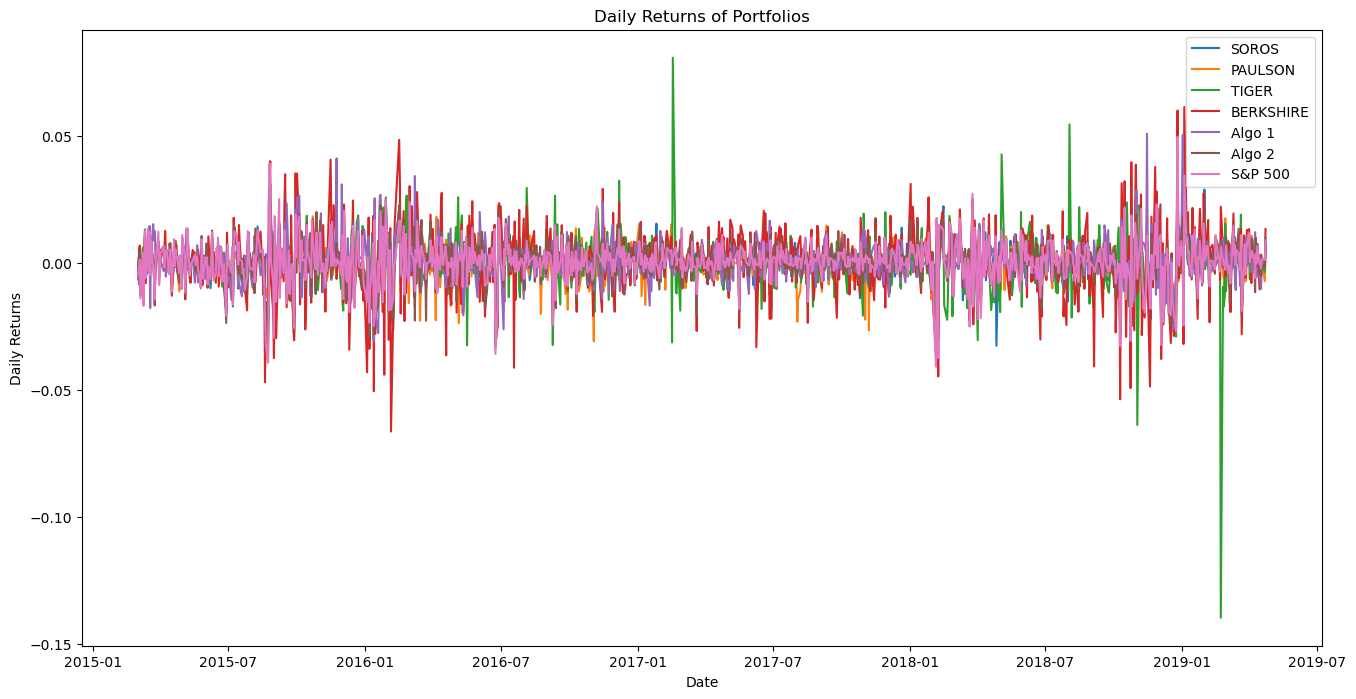

In [14]:
# Plot daily returns of all portfolios

import pandas as pd
import matplotlib.pyplot as plt

merged_df_reset = merged_df.reset_index()

plt.figure(figsize=(16,8))
plt.plot(merged_df_reset['Date'], merged_df_reset[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500']])
plt.title('Daily Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'Algo 1', 'Algo 2', 'S&P 500'])
plt.show()











#### Calculate and Plot cumulative returns.

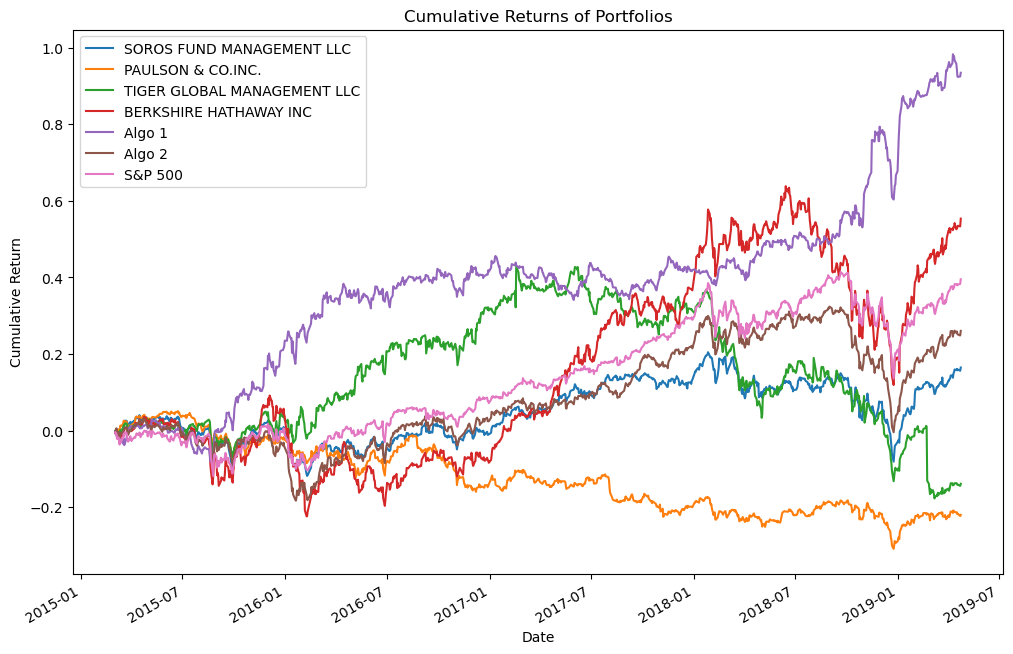

In [15]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + merged_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 8), title='Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.show()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [16]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios


### Determine which portfolios are riskier than the S&P 500

In [18]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [21]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [22]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [23]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios


In [25]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock


In [27]:
# Reading data from 2nd stock


In [28]:
# Reading data from 3rd stock


In [29]:
# Combine all stocks in a single DataFrame


In [30]:
# Reset Date index


In [31]:
# Reorganize portfolio data by having a column per symbol


In [32]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [37]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [39]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios


In [41]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!